In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [8]:
df= pd.read_csv('diabetes.csv')
df.iloc[:,:12]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0, 0.5, 'Body mass index')

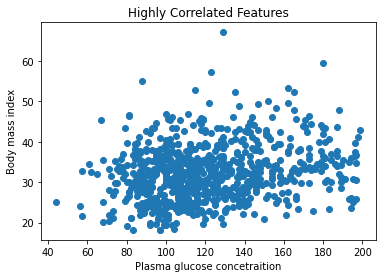

In [9]:
df[['Glucose','BMI']] = df[['Glucose','BMI']].replace(0,np.NaN)
fig, ax = plt.subplots()
ax.scatter(df.iloc[:,1].values, df.iloc[:,5].values)
ax.set_title('Highly Correlated Features')
ax.set_xlabel('Plasma glucose concetraition')
ax.set_ylabel('Body mass index')

In [10]:
X=df[['Glucose', 'BMI']]
y=df['Outcome']

#Preprocessing

In [11]:
#Normalizing Dataset
scaler = StandardScaler()
x_data = scaler.fit_transform(X)

#split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
model = LogisticRegression(solver='lbfgs')
clf = model.fit(x_train, y_train)

ValueError: ignored

In [ ]:
LR2_pred_labels = model.predict(x_test)

In [ ]:
print('Intercept (Beta 0): ', clf.intercept_)
print('Slopes (Beta 1 and Beta 2): ', clf.coef_)

In [ ]:
score = model.score(x_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, LR2_pred_labels))

In [ ]:
# Predict probabilities for each class label on test data
probs=model.predict_proba(X_test)
#probs[:,1]

# --------- This is for plottling logistic function plane --------
# Increments between points in a meshgrid
mesh_size = 1
# How much to extend beyond min and max values (optional)
margin = 0

# Identify min and max values for input variables
x_min, x_max = X_test['rating_difference'].min() - margin, X_test['rating_difference'].max() + margin
y_min, y_max = X_test['turns'].min() - margin, X_test['turns'].max() + margin

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# Use models to create a prediciton plane - Logistic Regression
pred_LR = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR[:,1].reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph

# --------- Create a boolean array for masking data (needed for graph) -------- 
mask_0 = y_test < 0.5   
mask_1 = y_test > 0.5 
#print(y_test)
#print(mask_0)
#print(mask_1)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

position = df[df['Outcome'].isin([1])]
negative = df[df['Outcome'].isin([0])]

ax.scatter(positive['Glucose'],positive['BMI'],s=50, c='b', marker='o', label=)
ax.scatter(negative['Glucose'],negative['BMI'],s=50, c='b', marker='o', label=)
ax.legend()
ax.set_xlabel('PLASMA GLUCOSE')
ax.set_ylabel('BODY MASS INDEX')

plt.xlim(40,200)
plt.ylim(20,60)
